### 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
# pd.set_option('display.max_colwidth', -1)
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#### #### #### #### #### HELPER METHODS #### #### #### #### ####


def df_null_percent(df):
    print("---xxx---"*10)
    print(round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2))
    print("---xxx---"*10)

def df_info(df):
    print("---xxx---"*10)
    print(df.info())
    print("---xxx---"*10)
    
    
def get_unique_val_count(df, col_list):
    for i in col_list:
        print("\n")
        print(df[i].value_counts())
        print("---xxx---"*10)


# Map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})


#### #### #### #### #### HELPER METHODS END #### #### #### #### ####

In [3]:
# Importing all datasets
leads_data = pd.read_csv("./Leads.csv")

In [4]:
# Imputing all the select( Unselected ) to nan

leads_data=leads_data.replace('select',np.nan)
leads_data=leads_data.replace('Select',np.nan)

In [5]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 

In [6]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Checking the percentage of missing values
df_null_percent(leads_data)

---xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx---
Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                       

## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

In [8]:
leads_data = leads_data[~np.isnan(leads_data['TotalVisits'])]
leads_data = leads_data[~np.isnan(leads_data['Page Views Per Visit'])]

In [9]:
check_list = ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
             'Through Recommendations', 'Receive More Updates About Our Courses',
             'I agree to pay the amount through cheque',
             'Do Not Call', 'What matters most to you in choosing a course'
             ]
get_unique_val_count(leads_data, check_list)



No     9089
Yes      14
Name: Search, dtype: int64
---xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx---


No    9103
Name: Magazine, dtype: int64
---xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx---


No     9101
Yes       2
Name: Newspaper Article, dtype: int64
---xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx---


No     9102
Yes       1
Name: X Education Forums, dtype: int64
---xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx---


No     9102
Yes       1
Name: Newspaper, dtype: int64
---xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx---


No     9099
Yes       4
Name: Digital Advertisement, dtype: int64
---xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx---


No     9096
Yes       7
Name: Through Recommendations, dtype: int64
---xxx------xxx------xxx------xxx---

In [10]:
# As these values are heavily skewed towards one side we drop them,
# They do not add any value to the dataset.

# Or cases like Prospect ID and Lead Number, they are just identifiers.

leads_data = leads_data.drop(['Magazine',
                              'Newspaper Article','X Education Forums','Newspaper',
                              'Digital Advertisement', 'Through Recommendations', 
                              'Receive More Updates About Our Courses',
                              'Prospect ID', 'Lead Number', 'Do Not Call','I agree to pay the amount through cheque',
                              'What matters most to you in choosing a course'
                             ], axis=1)

In [11]:
# Dropping columns with more than 45% null makes sense as imputing
# in any way would add the risk of inadvertently changing it's distribution

leads_data = leads_data.drop([ 'Asymmetrique Activity Index',
                              'Asymmetrique Profile Index',
                              'Asymmetrique Activity Score',
                              'Asymmetrique Profile Score',
                              'How did you hear about X Education',
                              'Lead Profile'
                             ], axis=1)

In [12]:
leads_data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Canada                     4
Germany                    4
South Africa               4
Nigeria                    4
Kuwait                     4
Sweden                     3
Uganda                     2
Bangladesh                 2
Asia/Pacific Region        2
Ghana                      2
Netherlands                2
Philippines                2
Belgium                    2
China                      2
Italy                      2
Kenya                      1
Vietnam                    1
Indonesia                  1
Russia                     1
Switzerland                1
Liberia                    1
Malaysia      

In [13]:
# As the value of country is heavily towards India we impute all null the values to India
# This would not change the distribution of the data.

leads_data['Country'].fillna(value=leads_data['Country'].value_counts().index[0],inplace =True)

In [14]:
df_null_percent(leads_data)

---xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx---
Lead Origin                                0.00
Lead Source                                0.32
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Country                                    0.00
Specialization                            36.30
What is your current occupation           29.47
Search                                     0.00
Tags                                      36.61
Lead Quality                              51.95
Update me on Supply Chain Content          0.00
Get updates on DM Content                  0.00
City                                      39.55
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.

In [15]:
# As city value is not required for the analysis process we can drop it.

leads_data = leads_data.drop(['City'], axis = 1)

In [16]:
# get_unique_val_count(leads_data, ['Tags', 'What is your current occupation'])

In [17]:
# List of variables to map

varlist =  ['Do Not Email', 'Search', 'Update me on Supply Chain Content', 'Get updates on DM Content',
            'A free copy of Mastering The Interview']

leads_data[varlist] = leads_data[varlist].apply(binary_map)

In [18]:
# Removing NaN of Lead Source rows

leads_data = leads_data.dropna(axis=0, subset=['Lead Source'])

In [19]:
df_null_percent(leads_data)

---xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx---
Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Country                                    0.00
Specialization                            36.17
What is your current occupation           29.57
Search                                     0.00
Tags                                      36.67
Lead Quality                              52.02
Update me on Supply Chain Content          0.00
Get updates on DM Content                  0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64
---xxx------xxx------xxx------

In [20]:
check_list = ['Specialization',
              'What is your current occupation',
              'Lead Quality'
             ]
get_unique_val_count(leads_data, check_list)



Finance Management                   959
Human Resource Management            837
Marketing Management                 823
Operations Management                499
Business Administration              399
IT Projects Management               366
Supply Chain Management              346
Banking, Investment And Insurance    335
Media and Advertising                202
Travel and Tourism                   202
International Business               176
Healthcare Management                156
Hospitality Management               111
E-COMMERCE                           111
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64
---xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx---


Unemployed              5476
Working Professional     677
Student                  206
Other                     15
Housewife       

In [21]:
# As Lead Quality are subjective to the employer, we will remove them. This will create an objective dataset

leads_data = leads_data.drop(['Lead Quality', 'Tags', 'What is your current occupation'], axis = 1)

In [22]:
leads_data['Specialization'].fillna(value="Others",inplace =True)
# leads_data['What is your current occupation'].fillna(value="Not Defined",inplace =True)

In [23]:
df_null_percent(leads_data)

---xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx---
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
Search                                    0.0
Update me on Supply Chain Content         0.0
Get updates on DM Content                 0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64
---xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx---


In [24]:
check_list = [
              'Lead Origin','Lead Source',
              'Do Not Email','Search',
              'Update me on Supply Chain Content',
              'Get updates on DM Content',
              'A free copy of Mastering The Interview',
              'Last Notable Activity'
            ]
get_unique_val_count(leads_data, check_list)



Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
---xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx---


Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
blog                    1
youtubechannel          1
welearnblog_Home        1
NC_EDM                  1
testone                 1
WeLearn                 1
Name: Lead Source, dtype: int64
---xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx---


0    8358
1     716
Name: Do Not Email, dtype: int64
---xxx------xxx------

In [25]:
leads_data = leads_data.drop(['Do Not Email', 'Search', 
                              'Update me on Supply Chain Content',
                             'Get updates on DM Content', 'Country'], axis = 1)

In [26]:
df_null_percent(leads_data)

---xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx---
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64
---xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx---


#### Checking for Outliers

In [27]:
# Checking for outliers in the continuous variables
num_analysis = leads_data[['TotalVisits','Total Time Spent on Website',
                           'Page Views Per Visit']]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_analysis.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


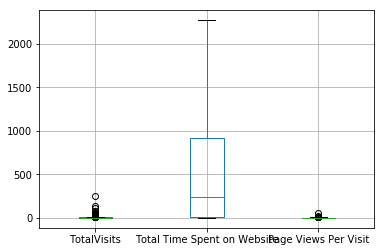

In [28]:
### There are some heavy outliers in the dataset

num_analysis.boxplot()

In [29]:
# outlier treatment for TotalVisits
temp = 'TotalVisits'
Q1 = leads_data[temp].quantile(0.05)
Q3 = leads_data[temp].quantile(0.95)
IQR = Q3 - Q1
leads_data = leads_data[(leads_data[temp] >= Q1 - 1.5*IQR) & (leads_data[temp] <= Q3 + 1.5*IQR)]

# outlier treatment for Total Time Spent on Website
temp = 'Total Time Spent on Website'
Q1 = leads_data[temp].quantile(0.05)
Q3 = leads_data[temp].quantile(0.95)
IQR = Q3 - Q1
leads_data = leads_data[(leads_data[temp] >= Q1 - 1.5*IQR) & (leads_data[temp] <= Q3 + 1.5*IQR)]

# outlier treatment for Page Views Per Visit
temp = 'Page Views Per Visit'
Q1 = leads_data[temp].quantile(0.05)
Q3 = leads_data[temp].quantile(0.95)
IQR = Q3 - Q1
leads_data = leads_data[(leads_data[temp] >= Q1 - 1.5*IQR) & (leads_data[temp] <= Q3 + 1.5*IQR)]


In [30]:
# Checking for outliers in the continuous variables
num_analysis = leads_data[['TotalVisits','Total Time Spent on Website',
                           'Page Views Per Visit','A free copy of Mastering The Interview']]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_analysis.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9048.000000,9048.000000,9048.000000,9048.000000
mean,3.327697,482.994584,2.350491,0.317750
std,3.292078,545.531995,2.051093,0.465627
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,10.000000,1.000000,0.000000
50%,3.000000,246.000000,2.000000,0.000000
75%,5.000000,924.000000,3.000000,1.000000
90%,7.000000,1374.300000,5.000000,1.000000
95%,9.000000,1557.000000,6.000000,1.000000
99%,16.000000,1839.000000,9.000000,1.000000


## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model. First, let's take a look at the dataset again.

In [31]:
dataset = leads_data.copy()

In [32]:
dataset.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000
mean,0.378868,3.327697,482.994584,2.350491,0.317750
std,0.485132,3.292078,545.531995,2.051093,0.465627
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,10.000000,1.000000,0.000000
50%,0.000000,3.000000,246.000000,2.000000,0.000000
75%,1.000000,5.000000,924.000000,3.000000,1.000000
max,1.000000,25.000000,2272.000000,15.000000,1.000000


In [33]:
df_info(dataset)

---xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9048 entries, 0 to 9239
Data columns (total 10 columns):
Lead Origin                               9048 non-null object
Lead Source                               9048 non-null object
Converted                                 9048 non-null int64
TotalVisits                               9048 non-null float64
Total Time Spent on Website               9048 non-null int64
Page Views Per Visit                      9048 non-null float64
Last Activity                             9048 non-null object
Specialization                            9048 non-null object
A free copy of Mastering The Interview    9048 non-null int64
Last Notable Activity                     9048 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 777.6+ KB
None
---xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx------xxx---


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [34]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(dataset[['Lead Origin', 'Lead Source', 
                                 'Last Activity', 'Specialization',
                                 'Last Notable Activity'
                                ]], drop_first=True)

# Adding the results to the master dataframe
dataset = pd.concat([dataset, dummy1], axis=1)

# We have created dummies for the below variables, so we can drop them
dataset = dataset.drop(['Lead Origin', 'Lead Source', 
                         'Last Activity', 'Specialization',
                         'Last Notable Activity'
                        ], 1)

In [35]:
# Checking the new dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9048 entries, 0 to 9239
Data columns (total 77 columns):
Converted                                             9048 non-null int64
TotalVisits                                           9048 non-null float64
Total Time Spent on Website                           9048 non-null int64
Page Views Per Visit                                  9048 non-null float64
A free copy of Mastering The Interview                9048 non-null int64
Lead Origin_Landing Page Submission                   9048 non-null uint8
Lead Origin_Lead Add Form                             9048 non-null uint8
Lead Origin_Lead Import                               9048 non-null uint8
Lead Source_Direct Traffic                            9048 non-null uint8
Lead Source_Facebook                                  9048 non-null uint8
Lead Source_Google                                    9048 non-null uint8
Lead Source_Live Chat                                 9048 non-null uint8
L

In [36]:
dataset = dataset.drop(['Last Notable Activity_View in browser link Clicked'], axis = 1)

### Step 4: Test-Train Split

In [37]:
# Putting feature variable to X
# Putting response variable to y

X = dataset.drop(['Converted'], axis=1)
y = dataset['Converted']

In [38]:
y.head(5)

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [39]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [40]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 
         'Page Views Per Visit', 
         'A free copy of Mastering The Interview']] = scaler.fit_transform(X_train[[
                                                    'TotalVisits', 
                                                    'Total Time Spent on Website', 
                                                    'Page Views Per Visit', 
                                                    'A free copy of Mastering The Interview']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
8425,-1.015121,-0.878510,-1.145788,-0.685108,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8341,-1.015121,-0.878510,-1.145788,-0.685108,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7376,-0.402157,-0.071940,-0.165214,1.459623,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7414,-1.015121,-0.878510,-1.145788,-0.685108,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3521,0.517288,1.213416,1.305648,-0.685108,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [41]:
### Checking the Conversion Rate
conversion_rate = (sum(dataset['Converted'])/len(dataset['Converted'].index))*100
conversion_rate

37.8868258178603

### Step 6: Looking at Correlations

In [42]:
# Let's see the correlation matrix 
# The dateset takes time to visualise
# HENCE COMMENTED IT OUT.


# plt.figure(figsize = (20,10))        # Size of the figure
# sns.heatmap(dataset.corr(),annot = True)
# plt.show()

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [43]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6261
Model Family:                Binomial   Df Model:                           71
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 26 Aug 2019   Deviance:                          nan
Time:                        06:01:56   Pearson chi2:                 8.21e+18
No. Iterations:                   100   Covariance Type:             nonrobust
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                            -3.06e+14   7.53e+07  -4.06e+06      0.000   -3.06e+14   -3.06e+14
TotalVisits                                      1.898e+14   1.29e+06   1.47e+08      0.000     1.9e+14     1.9e+14
Total Time Spent on Website                      8.328e+14   9.78e+05   8.52e+08      0.000    8.33e+14    8.33e+14
Page Views Per Visit                            -1.888e+14   1.39e+06  -1.36e+08      0.000   -1.89e+14   -1.89e+14
A free copy of Mastering The Interview          -8.437e+11   1.25e+06  -6.76e+05      0.000   -8.44e+11   -8.44e+11
Lead Origin_Landing Page Submission               3.14e+14   3.36e+06   9.33e+07      0.000    3.14e+14    3.14e+14
Lead Origin_Lead Add Form                        4.425e+15   4.76e+07    9.3e+07      0.000    4.42e+15    4.42e+15
Lead Origin_Lead Import                          4.089e+15   6.89e+07   5.94e+07      0.000    4.09e+15    4.09e+15
Lead Source_Direct Traffic                       4.534e+15   6.74e+07   6.73e+07      0.000    4.53e+15    4.53e+15
Lead Source_Facebook                             1.008e+15   9.52e+07   1.06e+07      0.000    1.01e+15    1.01e+15
Lead Source_Google                                4.67e+15   6.73e+07   6.94e+07      0.000    4.67e+15    4.67e+15
Lead Source_Live Chat                            6.917e+15   8.24e+07    8.4e+07      0.000    6.92e+15    6.92e+15
Lead Source_NC_EDM                               3.373e+15    9.5e+07   3.55e+07      0.000    3.37e+15    3.37e+15
Lead Source_Olark Chat                           4.111e+15   6.74e+07    6.1e+07      0.000    4.11e+15    4.11e+15
Lead Source_Organic Search                       4.662e+15   6.74e+07   6.92e+07      0.000    4.66e+15    4.66e+15
Lead Source_Pay per Click Ads                    1.998e+12   9.52e+07    2.1e+04      0.000       2e+12       2e+12
Lead Source_Press_Release                          68.3104   3.85e-06   1.77e+07      0.000      68.310      68.310
Lead Source_Reference                            2.283e+15   4.78e+07   4.78e+07      0.000    2.28e+15    2.28e+15
Lead Source_Referral Sites                       4.809e+15   6.78e+07    7.1e+07      0.000    4.81e+15    4.81e+15
Lead Source_Social Media                         4.494e+15   8.26e+07   5.44e+07      0.000    4.49e+15    4.49e+15
Lead Source_WeLearn                              7.699e+15   9.52e+07   8.09e+07      0.000     7.7e+15     7.7e+15
Lead Source_Welingak Website                     3.072e+15   4.82e+07   6.37e+07      0.000    3.07e+15    3.07e+15
Lead Source_bing                                 6.264e+14   7.53e+07   8.32e+06      0.000    6.26e+14    6.26e+14
Lead Source_blog                                -4.742e+14   9.52e+07  -4.98e+06      0.000   -4.74e+14   -4.74e+14
Lead Source_google            

### Step 8: Feature Selection Using RFE

In [44]:
logreg = LogisticRegression()

rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [45]:
rfe.support_

array([False,  True, False, False,  True,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False,  True,  True, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True,  True, False])

In [46]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 27),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('A free copy of Mastering The Interview', False, 47),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 13),
 ('Lead Source_Facebook', False, 39),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_NC_EDM', False, 21),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Pay per Click Ads', False, 37),
 ('Lead Source_Press_Release', False, 61),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 17),
 ('Lead Source_Social Media', False, 20),
 ('Lead Source_WeLearn', False, 29),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 14),
 ('Lead Source_blog', False, 18),
 ('Lead Source_google', False, 43),
 ('Lead Source_testone', Fals

In [47]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

##### Assessing the model with StatsModels

In [48]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2761.9
Date:                Mon, 26 Aug 2019   Deviance:                       5523.7
Time:                        06:01:58   Pearson chi2:                 6.25e+03
No. Iterations:                    19   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.5676      0.134     -4.229      0.000      -0.831      -0.305
Total Time Spent on Website                        1.0968      0.039     27.994      0.000       1.020       1.174
Lead Origin_Landing Page Submission               -1.2350      0.126     -9.791      0.000      -1.482      -0.988
Lead Origin_Lead Add Form                          3.4829      0.235     14.825      0.000       3.022       3.943
Lead Origin_Lead Import                            1.2305      0.482      2.553      0.011       0.286       2.175
Lead Source_Olark Chat                             1.1312      0.121      9.317      0.000       0.893       1.369
Lead Source_Welingak Website                       3.0055      1.039      2.893      0.004       0.970       5.041
Last Activity_Email Bounced                       -1.2591      0.339     -3.716      0.000      -1.923      -0.595
Last Activity_Email Opened                         0.6381      0.090      7.096      0.000       0.462       0.814
Last Activity_Email Received                      21.3553   1.22e+04      0.002      0.999   -2.38e+04    2.39e+04
Last Activity_Had a Phone Conversation             2.1437      0.978      2.192      0.028       0.227       4.061
Last Activity_Olark Chat Conversation             -1.0340      0.174     -5.952      0.000      -1.374      -0.693
Specialization_Others                             -1.3904      0.122    -11.391      0.000      -1.630      -1.151
Last Notable Activity_Had a Phone Conversation     1.5604      1.467      1.064      0.287      -1.315       4.436
Last Notable Activity_SMS Sent                     2.0150      0.099     20.329      0.000       1.821       2.209
Last Notable Activity_Unreachable                  2.2176      0.508      4.366      0.000       1.222       3.213
==================================================================================================================
"""

In [49]:
# as the p-value of 'Last Activity_Email Received' is more than 0.05 we will drop it.

X_train_sm_1 = X_train_sm.drop(['Last Activity_Email Received'], axis = 1)

In [50]:
logm2 = sm.GLM(y_train,X_train_sm_1, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2764.2
Date:                Mon, 26 Aug 2019   Deviance:                       5528.3
Time:                        06:01:58   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.5628      0.134     -4.196      0.000      -0.826      -0.300
Total Time Spent on Website                        1.0975      0.039     28.016      0.000       1.021       1.174
Lead Origin_Landing Page Submission               -1.2320      0.126     -9.770      0.000      -1.479      -0.985
Lead Origin_Lead Add Form                          3.4834      0.235     14.830      0.000       3.023       3.944
Lead Origin_Lead Import                            1.2325      0.482      2.557      0.011       0.288       2.177
Lead Source_Olark Chat                             1.1328      0.121      9.330      0.000       0.895       1.371
Lead Source_Welingak Website                       3.0050      1.039      2.893      0.004       0.969       5.041
Last Activity_Email Bounced                       -1.2664      0.339     -3.738      0.000      -1.930      -0.602
Last Activity_Email Opened                         0.6310      0.090      7.028      0.000       0.455       0.807
Last Activity_Had a Phone Conversation             2.1365      0.978      2.184      0.029       0.219       4.054
Last Activity_Olark Chat Conversation             -1.0403      0.174     -5.990      0.000      -1.381      -0.700
Specialization_Others                             -1.3900      0.122    -11.390      0.000      -1.629      -1.151
Last Notable Activity_Had a Phone Conversation     1.5602      1.467      1.063      0.288      -1.315       4.436
Last Notable Activity_SMS Sent                     2.0078      0.099     20.287      0.000       1.814       2.202
Last Notable Activity_Unreachable                  2.2106      0.508      4.352      0.000       1.215       3.206
==================================================================================================================
"""

In [51]:
# as the p-value of 'Last Notable Activity_Had a Phone Conversation' is more than 0.05 we will drop it.

X_train_sm_2 = X_train_sm_1.drop(['Last Notable Activity_Had a Phone Conversation'], axis = 1)

In [52]:
logm2 = sm.GLM(y_train,X_train_sm_2, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2764.8
Date:                Mon, 26 Aug 2019   Deviance:                       5529.5
Time:                        06:01:58   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.5628      0.134     -4.196      0.000      -0.826      -0.300
Total Time Spent on Website                1.0975      0.039     28.018      0.000       1.021       1.174
Lead Origin_Landing Page Submission       -1.2319      0.126     -9.771      0.000      -1.479      -0.985
Lead Origin_Lead Add Form                  3.4837      0.235     14.831      0.000       3.023       3.944
Lead Origin_Lead Import                    1.2327      0.482      2.558      0.011       0.288       2.177
Lead Source_Olark Chat                     1.1333      0.121      9.334      0.000       0.895       1.371
Lead Source_Welingak Website               3.0053      1.039      2.893      0.004       0.969       5.041
Last Activity_Email Bounced               -1.2664      0.339     -3.738      0.000      -1.930      -0.602
Last Activity_Email Opened                 0.6310      0.090      7.028      0.000       0.455       0.807
Last Activity_Had a Phone Conversation     2.9514      0.691      4.274      0.000       1.598       4.305
Last Activity_Olark Chat Conversation     -1.0402      0.174     -5.990      0.000      -1.381      -0.700
Specialization_Others                     -1.3907      0.122    -11.397      0.000      -1.630      -1.152
Last Notable Activity_SMS Sent             2.0079      0.099     20.287      0.000       1.814       2.202
Last Notable Activity_Unreachable          2.2106      0.508      4.352      0.000       1.215       3.206
==========================================================================================================
"""

In [53]:
#### NOW ALL THE P-VALUES ARE LESS THAN 0.5
#### WE CAN MOVE FORWARD WITH GETTING PREDICTIONS

In [54]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm_2)
y_train_pred[:10]

8425    0.239874
8341    0.239874
7376    0.223971
7414    0.239874
3521    0.824168
6623    0.056012
4651    0.250533
1240    0.056012
7692    0.555643
7473    0.408286
dtype: float64

In [55]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23987434, 0.23987434, 0.22397059, 0.23987434, 0.82416835,
       0.05601153, 0.25053281, 0.05601153, 0.55564342, 0.40828568])

##### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [56]:
y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conversion_Prob':y_train_pred})
# y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Conversion,Conversion_Prob
0,0,0.239874
1,0,0.239874
2,0,0.223971
3,0,0.239874
4,1,0.824168


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.3 else 0

In [57]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_train_pred_final.head()

,Conversion,Conversion_Prob,predicted
0,0,0.239874,0
1,0,0.239874,0
2,0,0.223971,0
3,0,0.239874,0
4,1,0.824168,1


In [58]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
print(confusion)

[[2953  986]
 [ 384 2010]]


In [59]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [60]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.7836728248855203


#### Checking VIFs

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_Had a Phone Conversation,3.01
12,Last Notable Activity_Had a Phone Conversation,3.00
11,Specialization_Others,2.34
1,Lead Origin_Landing Page Submission,2.30
4,Lead Source_Olark Chat,2.22
7,Last Activity_Email Opened,2.21
13,Last Notable Activity_SMS Sent,1.83
10,Last Activity_Olark Chat Conversation,1.71
2,Lead Origin_Lead Add Form,1.54
5,Lead Source_Welingak Website,1.32


In [62]:
### ALL THE VIF SCORES ARE BELOW 5

## Metrics beyond simply accuracy

In [63]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [64]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8395989974937343

In [65]:
# Let us calculate specificity
TN / float(TN+FP)

0.7496826605737497

In [66]:
# Calculate false postive rate - predicting Conversion when customer does not have Convert
print(FP/ float(TN+FP))

0.25031733942625034


In [67]:
# positive predictive value 
print (TP / float(TP+FP))

0.670894526034713


In [68]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8849265807611627


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [69]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [70]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


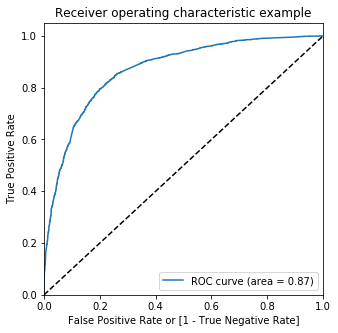

In [71]:
draw_roc(y_train_pred_final.Conversion, y_train_pred_final.Conversion_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [72]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Conversion,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.239874,0,1,1,1,0,0,0,0,0,0,0
1,0,0.239874,0,1,1,1,0,0,0,0,0,0,0
2,0,0.223971,0,1,1,1,0,0,0,0,0,0,0
3,0,0.239874,0,1,1,1,0,0,0,0,0,0,0
4,1,0.824168,1,1,1,1,1,1,1,1,1,1,0


In [73]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378020  1.000000  0.000000
0.1   0.1  0.580452  0.973266  0.341711
0.2   0.2  0.730144  0.906850  0.622747
0.3   0.3  0.783673  0.839599  0.749683
0.4   0.4  0.800568  0.772348  0.817720
0.5   0.5  0.800568  0.681287  0.873064
0.6   0.6  0.783041  0.553885  0.922315
0.7   0.7  0.765198  0.466583  0.946687
0.8   0.8  0.738039  0.360485  0.967504
0.9   0.9  0.696826  0.219298  0.987053


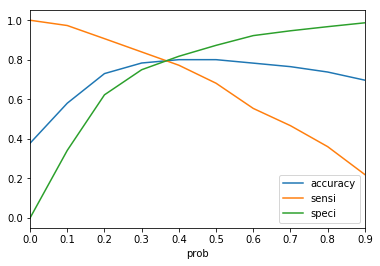

In [74]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [75]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Conversion,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.239874,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.239874,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.223971,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.239874,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.824168,1,1,1,1,1,1,1,1,1,1,0,1


In [76]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.final_predicted)

0.7929891046897205

In [77]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.final_predicted )
confusion2

array([[3078,  861],
       [ 450, 1944]])

In [78]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [79]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8120300751879699

In [80]:
# Let us calculate specificity
TN / float(TN+FP)

0.7814166031987814

In [81]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.21858339680121858


In [82]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6930481283422459


In [83]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8724489795918368


### Step 11: Making predictions on the test set

In [84]:
X_test[['TotalVisits', 'Total Time Spent on Website', 
         'Page Views Per Visit', 
         'A free copy of Mastering The Interview']] = scaler.transform(X_test[[
                                                    'TotalVisits', 
                                                    'Total Time Spent on Website', 
                                                    'Page Views Per Visit', 
                                                    'A free copy of Mastering The Interview']])

X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Specialization_Others,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
4462,-0.878510,0,0,0,1,0,0,0,0,0,0,0,0,1,0
5243,-0.582031,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4597,-0.086672,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4680,-0.878510,0,1,0,0,1,0,0,0,0,0,1,0,1,0
5355,-0.878510,0,0,0,1,0,0,1,0,0,0,1,0,0,0


In [85]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [86]:
X_test_sm_1 = X_test_sm.drop(['Last Activity_Email Received'], axis = 1)
X_test_sm_2 = X_test_sm_1.drop(['Last Notable Activity_Had a Phone Conversation'], axis = 1)
y_test_pred = res.predict(X_test_sm_2)

In [87]:
y_test_pred[:10]

4462    0.833991
5243    0.069637
4597    0.221173
4680    0.996239
5355    0.239874
7071    0.099473
6314    0.978973
2688    0.996239
6228    0.153168
3014    0.088799
dtype: float64

In [88]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [89]:
y_pred_1.head()

,0
4462,0.833991
5243,0.069637
4597,0.221173
4680,0.996239
5355,0.239874


In [90]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [91]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [92]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [93]:
y_pred_final.head()

,Converted,0
0,1,0.833991
1,0,0.069637
2,1,0.221173
3,1,0.996239
4,0,0.239874


In [94]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [95]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Converted','Conversion_Prob'], axis=1)

In [96]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.833991
1,0,0.069637
2,1,0.221173
3,1,0.996239
4,0,0.239874


In [98]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [99]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.833991,1
1,0,0.069637,0
2,1,0.221173,0
3,1,0.996239,1
4,0,0.239874,0


In [101]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7889502762430939

In [102]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1316,  365],
       [ 208,  826]])

In [103]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [104]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7988394584139265

In [105]:
# Let us calculate specificity
TN / float(TN+FP)

0.7828673408685306